In [144]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

# File to Load (Remember to Change These)
unemployed = Path("Resources/Unemployment_Canada_1976_present.csv")


# Unemployment



In [145]:
unemployed_df = pd.read_csv(unemployed)
unemployed_df.head()


,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
0,1976-01,Alberta,Both sexes,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1
1,1976-01,Alberta,Both sexes,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2
2,1976-01,Alberta,Both sexes,15 years and over,819500.0,693700.0,856500.0,125800.0,1276700.0,37000.0,64.2,67.1,4.3
3,1976-01,Alberta,Both sexes,25 to 54 years,491400.0,439800.0,505800.0,51600.0,661700.0,14400.0,74.3,76.4,2.8
4,1976-01,Alberta,Both sexes,25 years and over,587700.0,518800.0,604200.0,68900.0,914400.0,16500.0,64.3,66.1,2.7


In [146]:
#Filtering sex, part time labour and full time labour out of the data frame.
filt_unemployed_df = unemployed_df.filter(items= ["REF_DATE", "GEO", "Age group", "Population", "Labour force", "Employment","Unemployment",
                           "Participation rate", "Employment rate", "Unemployment rate"])

#Dropping NA values
filt_unemployed_df.dropna(inplace=True)

#Creating a copy of the data frame for manipulation later
copy_filt_unemploy_df = filt_unemployed_df.copy()

#Preview of the data
filt_unemployed_df.head()

,REF_DATE,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,1976-01,Alberta,15 to 24 years,362300.0,252300.0,231800.0,20500.0,69.6,64.0,8.1
1,1976-01,Alberta,15 to 64 years,1154800.0,837500.0,802400.0,35000.0,72.5,69.5,4.2
2,1976-01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3
3,1976-01,Alberta,25 to 54 years,661700.0,505800.0,491400.0,14400.0,76.4,74.3,2.8
4,1976-01,Alberta,25 years and over,914400.0,604200.0,587700.0,16500.0,66.1,64.3,2.7


In [147]:
filt_unemployed_df["Year"] = ""
filt_unemployed_df["Month"] = ""



filt_unemployed_df.head()

,REF_DATE,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate,Year,Month
0,1976-01,Alberta,15 to 24 years,362300.0,252300.0,231800.0,20500.0,69.6,64.0,8.1,,
1,1976-01,Alberta,15 to 64 years,1154800.0,837500.0,802400.0,35000.0,72.5,69.5,4.2,,
2,1976-01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3,,
3,1976-01,Alberta,25 to 54 years,661700.0,505800.0,491400.0,14400.0,76.4,74.3,2.8,,
4,1976-01,Alberta,25 years and over,914400.0,604200.0,587700.0,16500.0,66.1,64.3,2.7,,


In [148]:
for i, row in filt_unemployed_df.iterrows():
    date = row["REF_DATE"].split("-")
    filt_unemployed_df.loc[i,"Year"] = date[0]
    filt_unemployed_df.loc[i,"Month"] = date[1]
   

filt_unemployed_df.head()

,REF_DATE,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate,Year,Month
0,1976-01,Alberta,15 to 24 years,362300.0,252300.0,231800.0,20500.0,69.6,64.0,8.1,1976,01
1,1976-01,Alberta,15 to 64 years,1154800.0,837500.0,802400.0,35000.0,72.5,69.5,4.2,1976,01
2,1976-01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3,1976,01
3,1976-01,Alberta,25 to 54 years,661700.0,505800.0,491400.0,14400.0,76.4,74.3,2.8,1976,01
4,1976-01,Alberta,25 years and over,914400.0,604200.0,587700.0,16500.0,66.1,64.3,2.7,1976,01


In [149]:
filt_unemployed_df = filt_unemployed_df.filter(items= ["Year","Month", "GEO", "Age group", "Population", "Labour force", "Employment","Unemployment",
                           "Participation rate", "Employment rate", "Unemployment rate"])

filt_unemployed_df.head()

,Year,Month,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,1976,01,Alberta,15 to 24 years,362300.0,252300.0,231800.0,20500.0,69.6,64.0,8.1
1,1976,01,Alberta,15 to 64 years,1154800.0,837500.0,802400.0,35000.0,72.5,69.5,4.2
2,1976,01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3
3,1976,01,Alberta,25 to 54 years,661700.0,505800.0,491400.0,14400.0,76.4,74.3,2.8
4,1976,01,Alberta,25 years and over,914400.0,604200.0,587700.0,16500.0,66.1,64.3,2.7


In [150]:
filt_unemployed_df["GEO"].unique()

array(['Alberta', 'British Columbia', 'Canada', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia',
       'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan'],
      dtype=object)

In [151]:
provincial_unemploy = filt_unemployed_df.loc[filt_unemployed_df["GEO"] != "Canada"]
provincial_unemploy = filt_unemployed_df.loc[filt_unemployed_df["Age group"] == "15 years and over"]  
provincial_unemploy = provincial_unemploy[provincial_unemploy["Month"]== "01"]
provincial_unemploy

,Year,Month,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
2,1976,01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3
8,1976,01,British Columbia,15 years and over,1852400.0,1125400.0,1029700.0,95800.0,60.8,55.6,8.5
15,1976,01,Canada,15 years and over,16852400.0,10369700.0,9636700.0,733000.0,61.5,57.2,7.1
23,1976,01,Manitoba,15 years and over,732900.0,452800.0,427400.0,25300.0,61.8,58.3,5.6
29,1976,01,New Brunswick,15 years and over,476800.0,258700.0,229600.0,29100.0,54.3,48.2,11.2
...,...,...,...,...,...,...,...,...,...,...,...
38957,2023,01,Nova Scotia,15 years and over,851700.0,528100.0,501600.0,26500.0,62.0,58.9,5.0
38963,2023,01,Ontario,15 years and over,12628200.0,8276300.0,7849700.0,426600.0,65.5,62.2,5.2
38969,2023,01,Prince Edward Island,15 years and over,141500.0,90800.0,83900.0,7000.0,64.2,59.3,7.7
38975,2023,01,Quebec,15 years and over,7204500.0,4696900.0,4511600.0,185300.0,65.2,62.6,3.9


# Unemployment vs Expenditure

In [152]:
household_spending = Path("Resources/Household spending.csv")
household_spending_df = pd.read_csv(household_spending)
household_spending_df.head()

,REF_DATE,GEO,DGUID,Statistic,"Household expenditures, summary-level categories",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2010,Canada,2016A000011124,Average expenditure per household,Total expenditure,Dollars,81,units,0,v54325508,1.1.1,72075.0,NaN,NaN,NaN,0
1,2010,Canada,2016A000011124,Average expenditure per household,Total current consumption,Dollars,81,units,0,v54325509,1.1.2,54013.0,NaN,NaN,NaN,0
2,2010,Canada,2016A000011124,Average expenditure per household,Food expenditures,Dollars,81,units,0,v54325510,1.1.3,7850.0,NaN,NaN,NaN,0
3,2010,Canada,2016A000011124,Average expenditure per household,Food purchased from stores,Dollars,81,units,0,v54325511,1.1.4,5709.0,NaN,NaN,NaN,0
4,2010,Canada,2016A000011124,Average expenditure per household,Bakery products,Dollars,81,units,0,v64469102,1.1.43,581.0,NaN,NaN,NaN,0


In [153]:
filt_spending_df = household_spending_df.filter(items= ["REF_DATE", "GEO", "Household expenditures, summary-level categories", "VALUE"])
filt_spending_df = filt_spending_df.rename (columns={"REF_DATE": "Year", "Household expenditures, summary-level categories": "Categories", "VALUE":"Average Spending"})
filt_spending_df

,Year,GEO,Categories,Average Spending
0,2010,Canada,Total expenditure,72075.0
1,2010,Canada,Total current consumption,54013.0
2,2010,Canada,Food expenditures,7850.0
3,2010,Canada,Food purchased from stores,5709.0
4,2010,Canada,Bakery products,581.0
...,...,...,...,...
40373,2021,British Columbia,Gifts of money and support payments,1052.0
40374,2021,British Columbia,Gifts of money to persons living in Canada,594.0
40375,2021,British Columbia,Gifts of money to persons living outside Canada,213.0
40376,2021,British Columbia,Alimony and child support,NaN


In [154]:
#Change the data to yearly average

provincial_unemploy_avg_df = provincial_unemploy.filter(items= ["Year", "GEO", "Population", "Labour force", "Employment","Unemployment",
                           "Participation rate", "Employment rate", "Unemployment rate"])
provincial_unemploy_avg_df


#provincial_unemploy_avg_df = provincial_unemploy_avg_df.groupby(["Year","GEO"])
provincial_unemploy_avg_df = provincial_unemploy_avg_df.reset_index()

print(provincial_unemploy_avg_df.columns)
provincial_unemploy_avg_df

Index(['index', 'Year', 'GEO', 'Population', 'Labour force', 'Employment',
       'Unemployment', 'Participation rate', 'Employment rate',
       'Unemployment rate'],
      dtype='object')


,index,Year,GEO,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,2,1976,Alberta,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3
1,8,1976,British Columbia,1852400.0,1125400.0,1029700.0,95800.0,60.8,55.6,8.5
2,15,1976,Canada,16852400.0,10369700.0,9636700.0,733000.0,61.5,57.2,7.1
3,23,1976,Manitoba,732900.0,452800.0,427400.0,25300.0,61.8,58.3,5.6
4,29,1976,New Brunswick,476800.0,258700.0,229600.0,29100.0,54.3,48.2,11.2
...,...,...,...,...,...,...,...,...,...,...
523,38957,2023,Nova Scotia,851700.0,528100.0,501600.0,26500.0,62.0,58.9,5.0
524,38963,2023,Ontario,12628200.0,8276300.0,7849700.0,426600.0,65.5,62.2,5.2
525,38969,2023,Prince Edward Island,141500.0,90800.0,83900.0,7000.0,64.2,59.3,7.7
526,38975,2023,Quebec,7204500.0,4696900.0,4511600.0,185300.0,65.2,62.6,3.9


In [155]:
#Merge 2 dataset
provincial_unemploy_avg_df['Year'] = provincial_unemploy_avg_df['Year'].astype(int)
filt_spending_df['Year'] = filt_spending_df['Year'].astype(int)

Spending_Unemployment = pd.merge(filt_spending_df, provincial_unemploy_avg_df, how="left", on=["Year", "GEO"])
Spending_Unemployment = Spending_Unemployment.drop("index",axis=1)
Spending_Unemployment

,Year,GEO,Categories,Average Spending,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,2010,Canada,Total expenditure,72075.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
1,2010,Canada,Total current consumption,54013.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
2,2010,Canada,Food expenditures,7850.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
3,2010,Canada,Food purchased from stores,5709.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
4,2010,Canada,Bakery products,581.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
...,...,...,...,...,...,...,...,...,...,...,...
40373,2021,British Columbia,Gifts of money and support payments,1052.0,4320600.0,2849200.0,2631000.0,218200.0,65.9,60.9,7.7
40374,2021,British Columbia,Gifts of money to persons living in Canada,594.0,4320600.0,2849200.0,2631000.0,218200.0,65.9,60.9,7.7
40375,2021,British Columbia,Gifts of money to persons living outside Canada,213.0,4320600.0,2849200.0,2631000.0,218200.0,65.9,60.9,7.7
40376,2021,British Columbia,Alimony and child support,NaN,4320600.0,2849200.0,2631000.0,218200.0,65.9,60.9,7.7


In [156]:
#Filter for insurance premium
insurance_df = Spending_Unemployment[Spending_Unemployment["Categories"] == "Personal insurance payments and pension contributions"]
insurance_df.dropna(inplace=True)
insurance_df

C:\Users\cadkm\AppData\Local\Temp\ipykernel_23692\3967519840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df.dropna(inplace=True)


,Year,GEO,Categories,Average Spending,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
305,2010,Canada,Personal insurance payments and pension contri...,4018.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
937,2010,Newfoundland and Labrador,Personal insurance payments and pension contri...,3665.0,435700.0,258300.0,218800.0,39600.0,59.3,50.2,15.3
1253,2010,Prince Edward Island,Personal insurance payments and pension contri...,3674.0,115400.0,78300.0,70500.0,7900.0,67.9,61.1,10.1
1569,2010,Nova Scotia,Personal insurance payments and pension contri...,3707.0,774100.0,493800.0,448100.0,45700.0,63.8,57.9,9.3
1885,2010,New Brunswick,Personal insurance payments and pension contri...,3762.0,615800.0,397100.0,360400.0,36600.0,64.5,58.5,9.2
...,...,...,...,...,...,...,...,...,...,...,...
38883,2021,Ontario,Personal insurance payments and pension contri...,5625.0,12280500.0,7894500.0,7086100.0,808400.0,64.3,57.7,10.2
39477,2021,Manitoba,Personal insurance payments and pension contri...,5491.0,1049400.0,686500.0,631400.0,55100.0,65.4,60.2,8.0
39774,2021,Saskatchewan,Personal insurance payments and pension contri...,5357.0,888100.0,597800.0,555700.0,42100.0,67.3,62.6,7.0
40071,2021,Alberta,Personal insurance payments and pension contri...,6148.0,3527700.0,2452000.0,2199600.0,252400.0,69.5,62.4,10.3


Create Charts for Insurance payments

[]

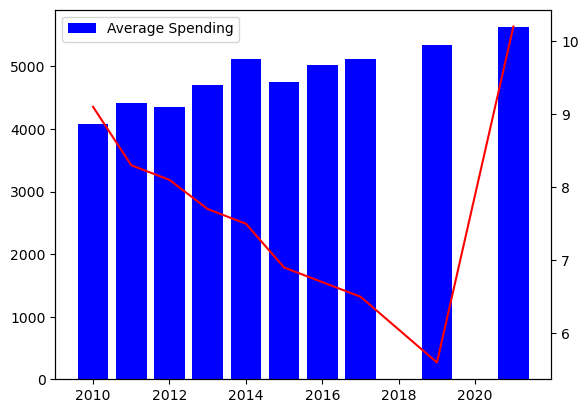

In [157]:
# filter for Ontario only
insurance_on_df = insurance_df[insurance_df["GEO"]== "Ontario"]

year = insurance_on_df["Year"]
avg_unemployment = insurance_on_df["Unemployment rate"]
avg_employment = insurance_on_df["Employment rate"]
avg_spending = insurance_on_df["Average Spending"]

fig, ax = plt.subplots()
ax.bar(year, avg_spending, color='blue', label="Average Spending")

ax2= ax.twinx()

#ax2.plot(year, avg_employment, color='green', label="Employment Rate")
ax2.plot(year, avg_unemployment, color='red', label="Unemployment Rate")

ax.legend()

ax.plot()

# Unemployment vs Immigration

In [158]:
immigration = Path("Resources/Immigration_Data.csv")
immigration_df = pd.read_csv(immigration)

immigration_df.head()

,REF_DATE,GEO,DGUID,Gender,Type of migrant,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1971/1972,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,729,NaN,NaN,NaN,0
1,1972/1973,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,751,NaN,NaN,NaN,0
2,1973/1974,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,1128,NaN,NaN,NaN,0
3,1974/1975,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,995,NaN,NaN,NaN,0
4,1975/1976,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,1013,NaN,NaN,NaN,0


In [159]:
#Filtering sex, part time labour and full time labour out of the data frame.
filt_immigration_df = immigration_df.filter(items= ["REF_DATE", "GEO", "Age group", "VALUE"])
filt_immigration_df.rename(columns={'VALUE': 'Total Immigrants'}, inplace=True)
#Dropping NA values
filt_immigration_df.dropna(inplace=True)


#Preview of the data
filt_immigration_df.head()

,REF_DATE,GEO,Age group,Total Immigrants
0,1971/1972,Newfoundland and Labrador,All ages,729
1,1972/1973,Newfoundland and Labrador,All ages,751
2,1973/1974,Newfoundland and Labrador,All ages,1128
3,1974/1975,Newfoundland and Labrador,All ages,995
4,1975/1976,Newfoundland and Labrador,All ages,1013


In [160]:
#Filtering by starting year
filt_immigration_df["Year"] = ""
filt_immigration_df.head()

for i, row in filt_immigration_df.iterrows():
    date = row["REF_DATE"].split("/")
    filt_immigration_df.loc[i,"Year"] = date[0]
    
#Arranging columns   
filt_immigration_df = filt_immigration_df.filter(items= ["Year", "GEO", "Age group", "Total Immigrants"])

filt_immigration_df.head()

,Year,GEO,Age group,Total Immigrants
0,1971,Newfoundland and Labrador,All ages,729
1,1972,Newfoundland and Labrador,All ages,751
2,1973,Newfoundland and Labrador,All ages,1128
3,1974,Newfoundland and Labrador,All ages,995
4,1975,Newfoundland and Labrador,All ages,1013


In [161]:
filt_immigration_df['Year'] = filt_immigration_df['Year'].astype(int)

ontario_immigration = filt_immigration_df.loc[
    (filt_immigration_df["GEO"] == "Ontario") &
    (filt_immigration_df["Age group"] == "All ages") &
    (filt_immigration_df["Year"] >= 1976) & (filt_immigration_df["Year"] <= 2022)]

ontario_immigration.rename(columns={"Age group": "Immigrant Age Group"}, inplace=True)


ontario_immigration.head()

C:\Users\cadkm\AppData\Local\Temp\ipykernel_23692\2988609725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ontario_immigration.rename(columns={"Age group": "Immigrant Age Group"}, inplace=True)


,Year,GEO,Immigrant Age Group,Total Immigrants
265,1976,Ontario,All ages,63267
266,1977,Ontario,All ages,49986
267,1978,Ontario,All ages,40768
268,1979,Ontario,All ages,64536
269,1980,Ontario,All ages,54648


In [162]:
filt_unemployed_df['Year'] = filt_unemployed_df['Year'].astype(int)

ontario_unemploy = filt_unemployed_df.loc[
    (filt_unemployed_df["GEO"] == "Ontario") &
    (filt_unemployed_df["Age group"] == "15 years and over") &
    (filt_unemployed_df["Month"] == "01") &
    (filt_unemployed_df['Year'] <= 2022) & (filt_unemployed_df["Year"] >= 1976)]



ontario_unemploy.head()

,Year,Month,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
47,1976,01,Ontario,15 years and over,6136300.0,3960000.0,3707400.0,252700.0,64.5,60.4,6.4
875,1977,01,Ontario,15 years and over,6275000.0,4048300.0,3776600.0,271700.0,64.5,60.2,6.7
1703,1978,01,Ontario,15 years and over,6407200.0,4148400.0,3859000.0,289300.0,64.7,60.2,7.0
2531,1979,01,Ontario,15 years and over,6526600.0,4342200.0,4036700.0,305500.0,66.5,61.8,7.0
3359,1980,01,Ontario,15 years and over,6644300.0,4442100.0,4146900.0,295100.0,66.9,62.4,6.6


In [163]:
ontario_merge = pd.merge(ontario_immigration, ontario_unemploy, how="left", on=["Year", "GEO"])




ontario_merge.head()


,Year,GEO,Immigrant Age Group,Total Immigrants,Month,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,1976,Ontario,All ages,63267,01,15 years and over,6136300.0,3960000.0,3707400.0,252700.0,64.5,60.4,6.4
1,1977,Ontario,All ages,49986,01,15 years and over,6275000.0,4048300.0,3776600.0,271700.0,64.5,60.2,6.7
2,1978,Ontario,All ages,40768,01,15 years and over,6407200.0,4148400.0,3859000.0,289300.0,64.7,60.2,7.0
3,1979,Ontario,All ages,64536,01,15 years and over,6526600.0,4342200.0,4036700.0,305500.0,66.5,61.8,7.0
4,1980,Ontario,All ages,54648,01,15 years and over,6644300.0,4442100.0,4146900.0,295100.0,66.9,62.4,6.6


[]

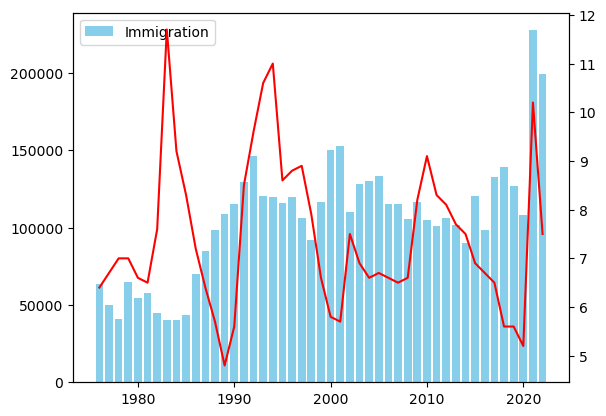

In [164]:
fig, ax = plt.subplots()
ax.bar(ontario_immigration["Year"], ontario_immigration['Total Immigrants'], color='skyblue', label="Immigration")

ax2= ax.twinx()

ax2.plot(ontario_unemploy["Year"], ontario_unemploy['Unemployment rate'], color='red', label="Unemployment Rate")

ax.legend()

ax.plot()

In [165]:
filt_immigration_df['Year'] = filt_immigration_df['Year'].astype(int)

quebec_immigration = filt_immigration_df.loc[
    (filt_immigration_df["GEO"] == "Quebec") &
    (filt_immigration_df["Age group"] == "All ages") &
    (filt_immigration_df["Year"] >= 1970) & (filt_immigration_df["Year"] <= 2022)]

bc_immigration = filt_immigration_df.loc[
    (filt_immigration_df["GEO"] == "British Columbia") &
    (filt_immigration_df["Age group"] == "All ages") &
    (filt_immigration_df["Year"] >= 1970) & (filt_immigration_df["Year"] <= 2022)]

alberta_immigration = filt_immigration_df.loc[
    (filt_immigration_df["GEO"] == "Alberta") &
    (filt_immigration_df["Age group"] == "All ages") &
    (filt_immigration_df["Year"] >= 1970) & (filt_immigration_df["Year"] <= 2022)]




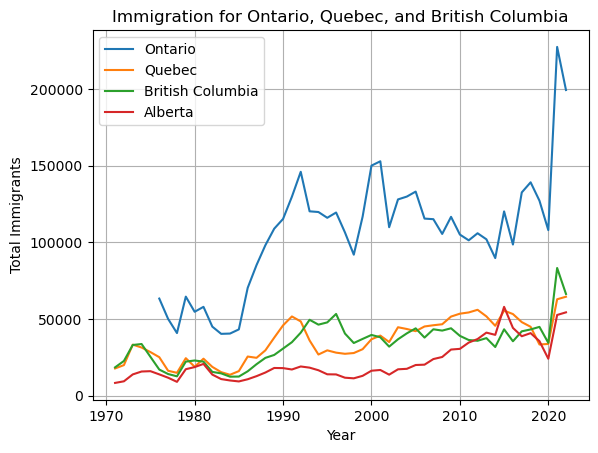

In [166]:
plt.plot(ontario_immigration['Year'], ontario_immigration['Total Immigrants'], label='Ontario')


plt.plot(quebec_immigration['Year'], quebec_immigration['Total Immigrants'], label='Quebec')


plt.plot(bc_immigration['Year'], bc_immigration['Total Immigrants'], label='British Columbia')

plt.plot(alberta_immigration['Year'], alberta_immigration['Total Immigrants'], label='Alberta')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.title('Immigration for Ontario, Quebec, and British Columbia')
plt.grid()
plt.legend()

# Display the plot
plt.show()

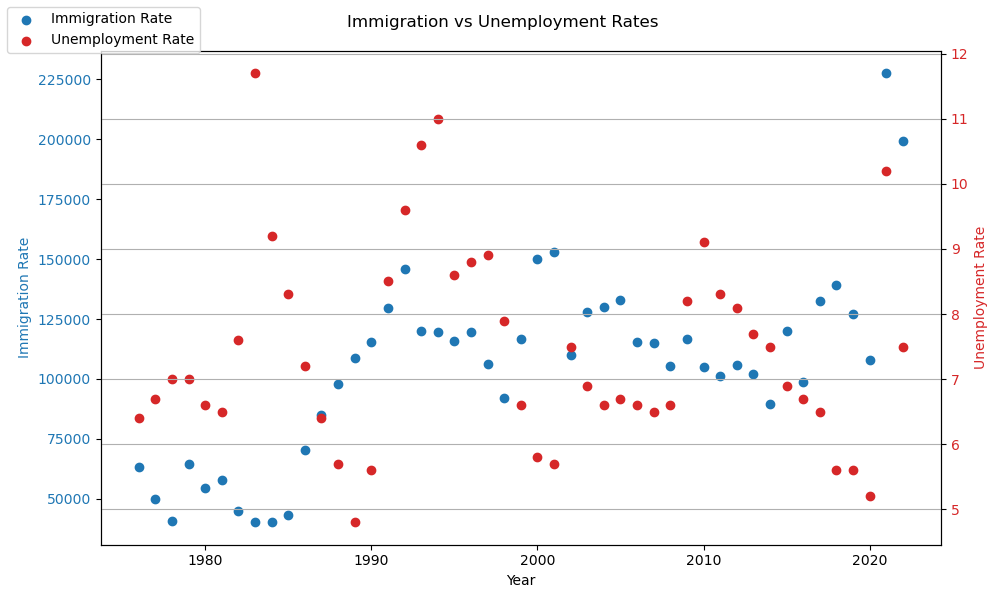

In [167]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Immigration Rate', color=color)
ax1.scatter(ontario_immigration['Year'], ontario_immigration['Total Immigrants'], color=color, label='Immigration Rate')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Unemployment Rate', color=color)
ax2.scatter(ontario_unemploy['Year'], ontario_unemploy['Unemployment rate'], color=color, label='Unemployment Rate')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Immigration vs Unemployment Rates')
fig.legend(loc="upper left")
fig.tight_layout()
plt.grid(True)
plt.show()

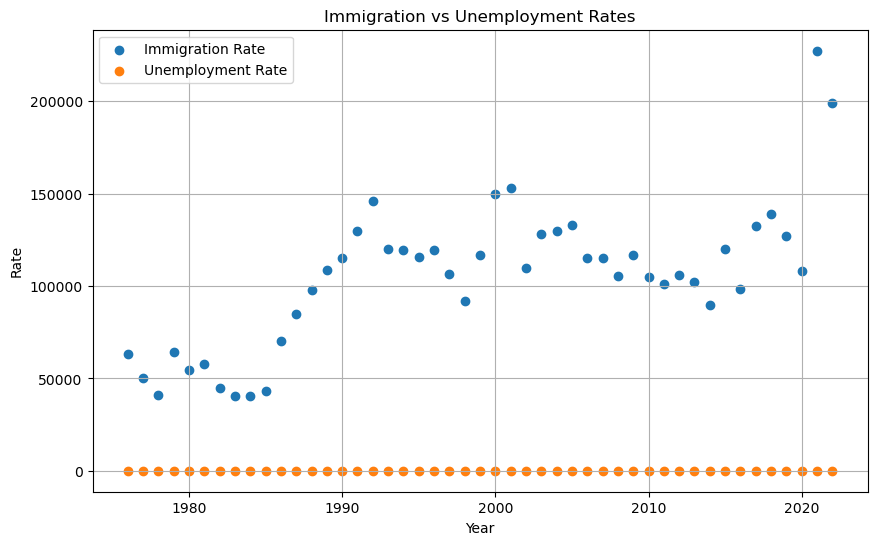

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(ontario_immigration['Year'], ontario_immigration['Total Immigrants'], label='Immigration Rate')
plt.scatter(ontario_unemploy['Year'], ontario_unemploy['Unemployment rate'], label='Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Immigration vs Unemployment Rates')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


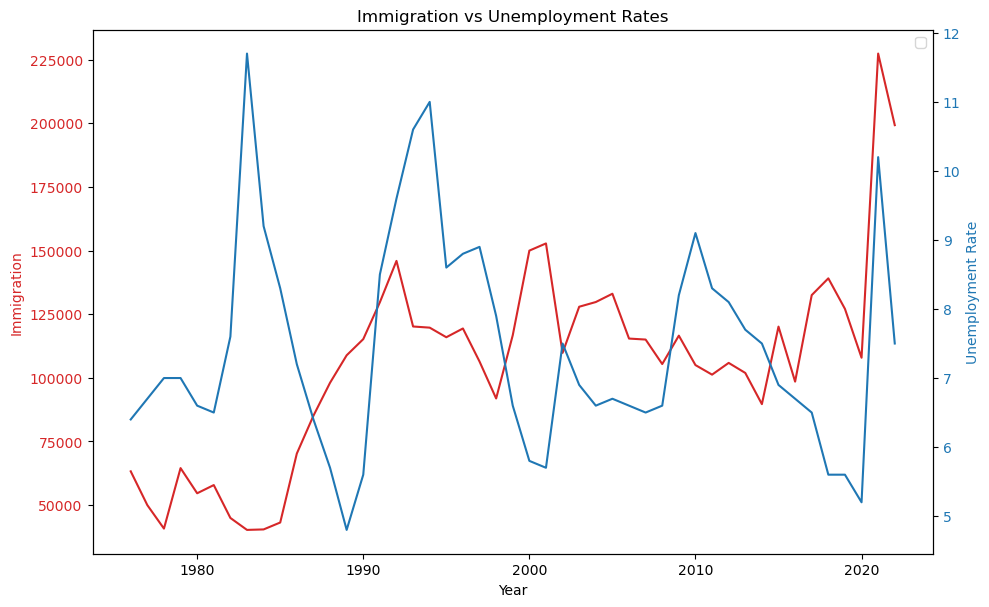

In [169]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Immigration', color=color)
ax1.plot(ontario_immigration['Year'], ontario_immigration['Total Immigrants'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Unemployment Rate', color=color)  
ax2.plot(ontario_unemploy['Year'], ontario_unemploy['Unemployment rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
plt.legend()

fig.tight_layout()  
plt.title('Immigration vs Unemployment Rates')
plt.show()

R squared: 1.3159424872773486e-05


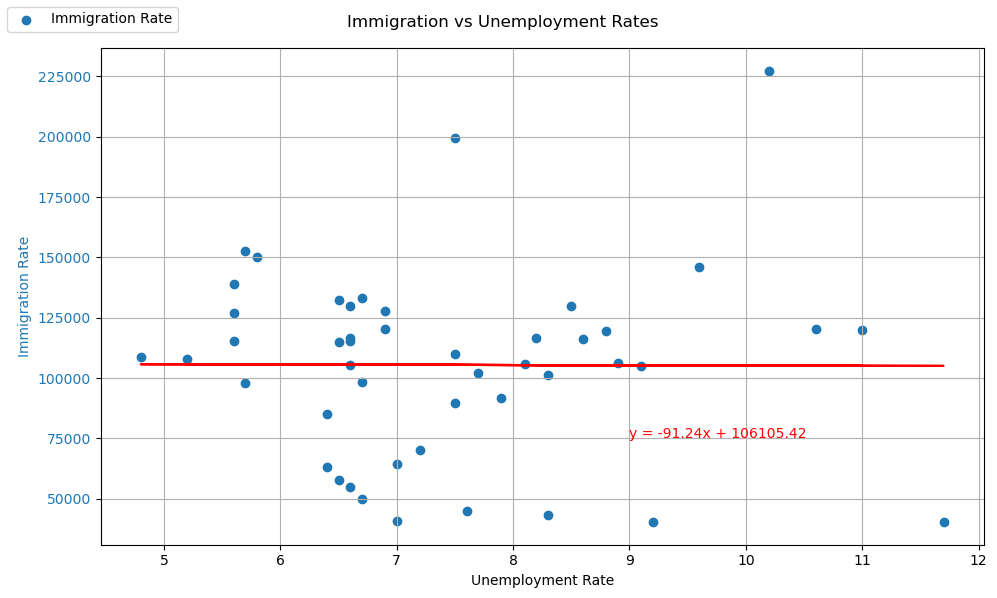

In [170]:
fig, ax1 = plt.subplots(figsize=(10, 6))
from scipy.stats import linregress

color = 'tab:blue'
ax1.set_xlabel('Unemployment Rate')
ax1.set_ylabel('Immigration Rate', color=color)
ax1.scatter(ontario_merge['Unemployment rate'], ontario_merge['Total Immigrants'], color=color, label='Immigration Rate')
ax1.tick_params(axis='y', labelcolor=color)


(slope, intercept, rvalue, pvalue, stderr) = linregress(ontario_merge['Unemployment rate'], ontario_merge['Total Immigrants'])
regress_values = ontario_merge['Unemployment rate'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(9, 75000), color='r')
plt.plot(ontario_merge['Unemployment rate'], regress_values, "r-")
fig.suptitle('Immigration vs Unemployment Rates')
fig.legend(loc="upper left")
fig.tight_layout()
print(f"R squared: {rvalue**2}")
plt.grid(True)
plt.show()



# Unemployment vs. EI 

In [ ]:
#read EI_Benefits .csv file

# Unemployment vs Public Transit

Next we take a look at whether or not unemployment can be used measure and predict public transit revenue. The thought process/assumption going into this analysis is that, higher unemployment rates should come with more people choosing to take public transit over driving/owning as they try to avoid car payments and gas prices. Thus, unemployment (rate) should be a good indicator variable for public transit revenue.

Null Hypothesis: There is no statistical significance between Unemployment and public transit.

Hypothesis: Unemployment is a factor that inifluences public transit (revenue).
____________________________________________________________________________________________________________________________________________


To go about this, we will be using data on public transit revenue provided by Statistics Canada (Statistics Canada, Table 23-10-0251-01) and merging onto our unemployment data. The data on public transit revenue has a date range from January 2017, to January 2024, so ideally there The analysis would be within this date range. However, the data is categorized by Cananda followed by the combined data of two or more provinces, example Quebec and Ontario or Atlantic. Due to time restraints of this project, we will just be looking at the data of Canada. When our unemployment data frame is filtered for Canada only (provinces filtered out), the date range is from January 1976 to January 2023. So upon merging the two frames, we will look at monthly data from January 2017 until January 2023.

In [171]:
#Reading in the public transit data

pub_trans = Path("Resources/public_trans_revenue(data_loading).csv")
pub_trans_df = pd.read_csv(pub_trans)

#displaying data

pub_trans_df.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Total revenue and total passenger trips,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,302.6,NaN,NaN,NaN,1
1,2017-02,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,314.5,NaN,NaN,NaN,1
2,2017-03,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,350.1,NaN,NaN,NaN,1
3,2017-04,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,309.6,NaN,NaN,NaN,1
4,2017-05,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,307.6,NaN,NaN,NaN,1


In [172]:
#Confirming how the data is catagorized by province
pub_trans_df["GEO"].unique()

array(['Canada', 'Atlantic', 'Quebec and Ontario',
       'Prairies, British Columbia and Territories'], dtype=object)

In [173]:
#Filtering the public transit data to just Canada. no provinces. 
canada_pub_df = pub_trans_df.loc[pub_trans_df["GEO"] == "Canada"]

In [174]:
#Cleaning the data. Filtering columns.

filtdf_can_pub = canada_pub_df.filter(items= ["REF_DATE", "GEO", "North American Industry Classification System (NAICS)",
                                    "Total revenue and total passenger trips", "VALUE", "SCALAR_FACTOR"])

# Preview the data
filtdf_can_pub.head()  

,REF_DATE,GEO,North American Industry Classification System (NAICS),Total revenue and total passenger trips,VALUE,SCALAR_FACTOR
0,2017-01,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",302.6,millions
1,2017-02,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",314.5,millions
2,2017-03,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",350.1,millions
3,2017-04,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",309.6,millions
4,2017-05,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",307.6,millions


In [175]:
#confirming number of rows
print(f'filtdf_can_pub has {filtdf_can_pub.shape[0]} number of rows')

#Dropping rows with no values and checking if any rows were dropped.
filtdf_can_pub.dropna(inplace=True)
print(f'filtdf_can_pub has {filtdf_can_pub.shape[0]} rows after droping null values')

filtdf_can_pub has 170 number of rows
filtdf_can_pub has 170 rows after droping null values


In [176]:
#Only the csv containing urban transit system data acquired. No rural transit systems present in this data.
print(f'{filtdf_can_pub["North American Industry Classification System (NAICS)"].unique()}')



['Urban transit systems [485110]']


In [177]:
#Further data cleaning and filtering.

#Removing the column from the data frame for readability
filtdf_can_pub.drop("North American Industry Classification System (NAICS)", axis=1, inplace= True)

#Seperating the "Total revenue and total passenger trips" column into two seperate data frames.
passtrips_can_df = filtdf_can_pub.loc[filtdf_can_pub["Total revenue and total passenger trips"] == 'Total passenger trips']
TotRev_can_df = filtdf_can_pub.loc[filtdf_can_pub["Total revenue and total passenger trips"] == 'Total revenue, excluding subsidies']

In [178]:
#cleaning the copy unemployment data frame. filtering age group to 15+ and geo to Canada only
filt_unemploy =  copy_filt_unemploy_df[(copy_filt_unemploy_df["Age group"] == "15 years and over")
                                            & (copy_filt_unemploy_df["GEO"] == "Canada")]


#merging unemployment onto transit revenue and transit passengers

merged_passtrips = passtrips_can_df.merge(filt_unemploy, how='left', on=["REF_DATE", "GEO"])
merged_totrev = TotRev_can_df.merge(filt_unemploy, how='left', on=["REF_DATE", "GEO"])

#dropping columns with null values
merged_passtrips.dropna(inplace=True)
merged_totrev.dropna(inplace=True)

In [179]:
#preview data
merged_passtrips.head()

,REF_DATE,GEO,Total revenue and total passenger trips,VALUE,SCALAR_FACTOR,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,2017-01,Canada,Total passenger trips,144.2,millions,15 years and over,29579400.0,19548500.0,18223200.0,1325300.0,66.1,61.6,6.8
1,2017-02,Canada,Total passenger trips,143.6,millions,15 years and over,29605000.0,19543400.0,18251500.0,1291900.0,66.0,61.7,6.6
2,2017-03,Canada,Total passenger trips,166.2,millions,15 years and over,29635700.0,19578600.0,18272700.0,1305900.0,66.1,61.7,6.7
3,2017-04,Canada,Total passenger trips,144.4,millions,15 years and over,29667200.0,19565100.0,18296700.0,1268400.0,65.9,61.7,6.5
4,2017-05,Canada,Total passenger trips,144.5,millions,15 years and over,29706800.0,19635400.0,18332500.0,1302900.0,66.1,61.7,6.6


In [180]:
#preview data
merged_totrev.head()

,REF_DATE,GEO,Total revenue and total passenger trips,VALUE,SCALAR_FACTOR,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,2017-01,Canada,"Total revenue, excluding subsidies",302.6,millions,15 years and over,29579400.0,19548500.0,18223200.0,1325300.0,66.1,61.6,6.8
1,2017-02,Canada,"Total revenue, excluding subsidies",314.5,millions,15 years and over,29605000.0,19543400.0,18251500.0,1291900.0,66.0,61.7,6.6
2,2017-03,Canada,"Total revenue, excluding subsidies",350.1,millions,15 years and over,29635700.0,19578600.0,18272700.0,1305900.0,66.1,61.7,6.7
3,2017-04,Canada,"Total revenue, excluding subsidies",309.6,millions,15 years and over,29667200.0,19565100.0,18296700.0,1268400.0,65.9,61.7,6.5
4,2017-05,Canada,"Total revenue, excluding subsidies",307.6,millions,15 years and over,29706800.0,19635400.0,18332500.0,1302900.0,66.1,61.7,6.6


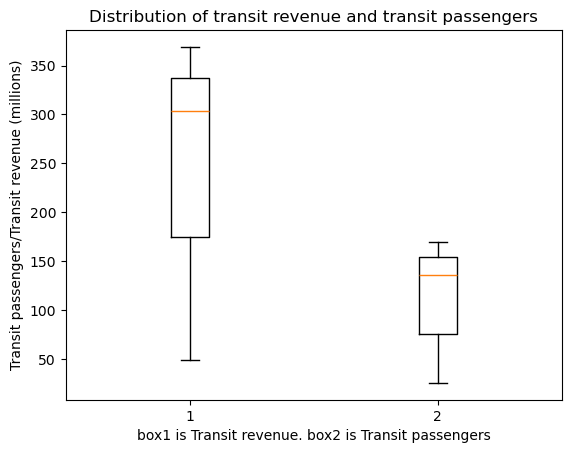

In [181]:
# Generating a box plot to check for outliers in transit revenue and transit 
# passengers
trans_revenue = merged_totrev["VALUE"]
trans_pass = merged_passtrips["VALUE"]

list_values = []
list_values.append(trans_revenue)
list_values.append(trans_pass)


flierprops = dict(marker='o', markerfacecolor='r', markeredgecolor='black')
plt.boxplot(list_values, flierprops=flierprops)
plt.title("Distribution of transit revenue and transit passengers")
plt.xlabel("box1 is Transit revenue. box2 is Transit passengers")
plt.ylabel("Transit passengers/Transit revenue (millions)")
plt.show()

In [182]:
print("No outliers found in the observed data set")

No outliers found in the observed data set


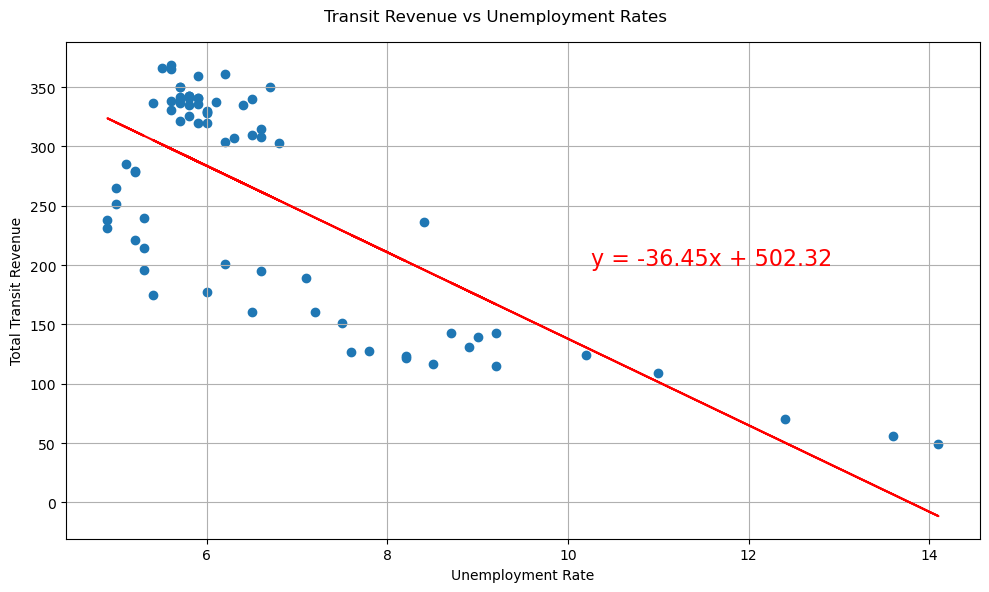

In [196]:
#Linear Regression
fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.set_xlabel('Unemployment Rate')
ax1.set_ylabel('Total Transit Revenue')
ax1.scatter(merged_totrev["Unemployment rate"], trans_revenue,)
ax1.tick_params(axis='y')


(slope, intercept, Rvalue, pvalue, stderr) = linregress(merged_totrev["Unemployment rate"], trans_revenue)
regress_values = merged_totrev["Unemployment rate"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(10.25, 200), color='r', size= 16)
plt.plot(merged_totrev["Unemployment rate"], regress_values, "r-")
fig.suptitle('Transit Revenue vs Unemployment Rates')
fig.tight_layout()
plt.grid(True)
plt.show()

Analysis here

Transit Revenue: Expected values vs Actual values.

In [184]:
#Created a subset data frame of just total revenue and unemployed rate
rev_subset_data = merged_totrev[["REF_DATE", "Unemployment rate", "VALUE"]]

#Creating a column to hold expected value.
rev_subset_data["Expected Value"] = ""

#Using line_eq y = -36.45x + 502.32, calculating expected values.

for i, row in rev_subset_data.iterrows():
    rev_subset_data.loc[i,"Expected Value"] = (-36.45 * row["Unemployment rate"]) + 502.32

rev_subset_data.head()

C:\Users\cadkm\AppData\Local\Temp\ipykernel_23692\2980147096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_subset_data["Expected Value"] = ""


,REF_DATE,Unemployment rate,VALUE,Expected Value
0,2017-01,6.8,302.6,254.46
1,2017-02,6.6,314.5,261.75
2,2017-03,6.7,350.1,258.105
3,2017-04,6.5,309.6,265.395
4,2017-05,6.6,307.6,261.75


Text(0.5, 1.0, 'Expected Transit Revenue vs Actual Revenue')

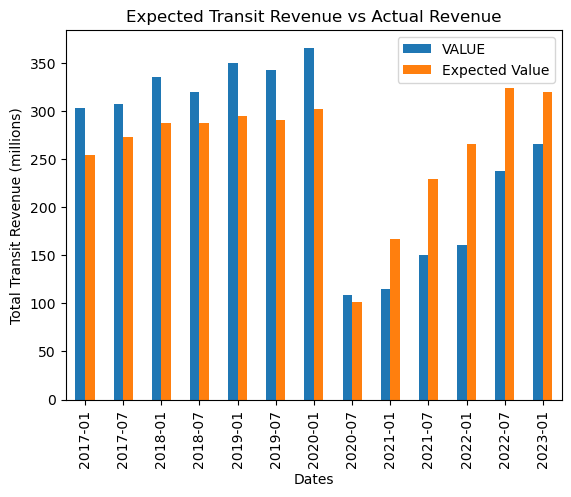

In [195]:
#Bar plotting observed values and expected values.
#For simplicity, we will look at January and July data points.
jan_july_rev = rev_subset_data[(rev_subset_data["REF_DATE"].str.contains('-01')) |
                               (rev_subset_data["REF_DATE"].str.contains('-07'))]

jan_july_rev.set_index("REF_DATE",inplace=True)


jan_july_rev[["VALUE", "Expected Value"]].plot.bar()
plt.xlabel("Dates")
plt.ylabel("Total Transit Revenue (millions)")
plt.title("Expected Transit Revenue vs Actual Revenue")